In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#1. Dien du lieu bi thieu
## Tinh so luong du lieu con thieu moi cot
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Dien du lieu con thieu vao embark town va deck
titanic['embark_town'] = titanic['embark_town'].fillna('Unknown')
titanic['deck'] = titanic['deck'].cat.add_categories('no_deck')
titanic['deck'] = titanic['deck'].fillna('no_deck')

In [6]:
# Dien du lieu vao cot age

titanic.groupby(['who','sibsp', 'parch'])['age'].agg(lambda x:x.isnull().sum()/len(x))

who    sibsp  parch
child  0      0        0.000000
              1        0.000000
              2        0.000000
       1      0        0.000000
              1        0.000000
              2        0.000000
       2      1        0.000000
              2        0.000000
       3      1        0.000000
              2        0.000000
       4      1        0.000000
              2        0.000000
       5      2        0.000000
man    0      0        0.260976
              1        0.000000
              2        0.000000
       1      0        0.118644
              1        0.095238
              2        0.200000
              3        0.000000
              4        0.000000
              5        0.000000
       2      0        0.153846
              1        0.000000
       3      1        1.000000
              2        0.000000
       4      1        0.000000
       8      2        1.000000
woman  0      0        0.214876
              1        0.055556
              2     

In [7]:
ser = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))

C:\Users\truon\AppData\Local\Temp\ipykernel_3148\1430732768.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ser = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))


In [8]:
titanic['age'] = ser

In [9]:
titanic['age'].isna().sum()

11

In [10]:
ser = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
ser

C:\Users\truon\AppData\Local\Temp\ipykernel_3148\4066297233.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ser = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [11]:
titanic['age'] = ser

In [12]:
titanic['age'].isnull().sum()

7

In [13]:
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
sibsp parch                            
0     0      537  32.315390         0.0
      1       38  29.647276         0.0
      2       29  21.597586         0.0
      3        1  24.000000         0.0
      4        1  29.000000         0.0
      5        2  40.000000         0.0
1     0      123  32.251148         0.0
      1       57  27.525439         0.0
      2       19  21.579123         0.0
      3        3  39.333333         0.0
      4        3  49.666667         0.0
      5        3  38.666667         0.0
      6        1  43.000000         0.0
2     0       16  31.991477         0.0
      1        7   8.357143         0.0
      2        4  17.250000         0.0
      3        1  24.000000         0.0
3     0        2  31.500000         0.0
      1        7   4.333333         0.0
      2        7  13.000000         0.0
4     1        9   6.777778         0.0
      2        9   7.333333         0.0
5     2        5  10.200000         0.0
8     2        7        NaN         1.0

In [14]:
titanic[titanic['who'] == 'child']['age'].mean()

6.369518072289156

In [15]:
titanic['age'] = titanic['age'].fillna(titanic[titanic['who'] == 'child']['age'].mean())

In [16]:
titanic['age'].isna().sum()

0

In [17]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
#2. Tao bien phai sinh

In [19]:
# Xu ly so lieu dang so

<Axes: xlabel='age', ylabel='Count'>

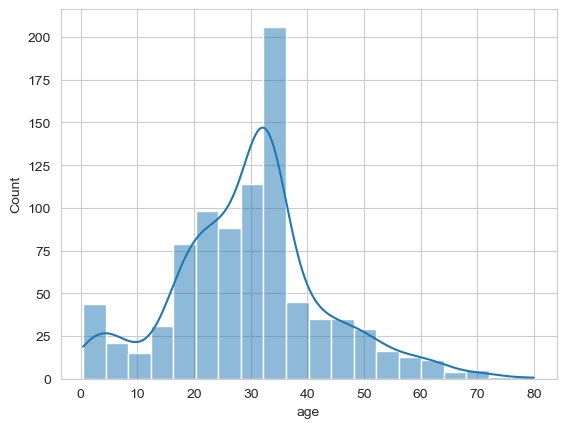

In [20]:
sns.histplot(data= titanic, x = 'age', kde = True, bins = 20)

In [21]:
age_group = [0,15,25,45,60,70,100]

In [22]:
titanic['age_group'] = pd.cut(titanic['age'], bins = age_group)
titanic['age_group']

0      (15, 25]
1      (25, 45]
2      (25, 45]
3      (25, 45]
4      (25, 45]
         ...   
886    (25, 45]
887    (15, 25]
888    (25, 45]
889    (25, 45]
890    (25, 45]
Name: age_group, Length: 891, dtype: category
Categories (6, interval[int64, right]): [(0, 15] < (15, 25] < (25, 45] < (45, 60] < (60, 70] < (70, 100]]

<Axes: xlabel='fare', ylabel='Count'>

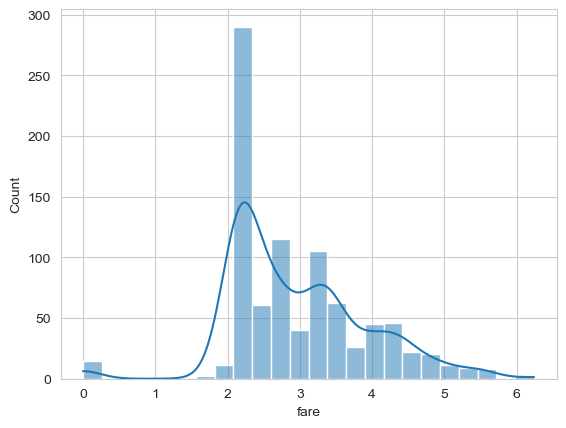

In [23]:
sns.histplot(x = np.log1p(titanic['fare']), kde = True)

In [24]:
titanic['log_fare'] = np.log1p(titanic['fare'])

In [25]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
age_group      0
log_fare       0
dtype: int64

In [26]:
#Xu ly du lieu dang phan loai 
# ['sex', 'adult male', 'alone']

In [27]:
titanic['gender'] = titanic['sex'].map({'male':0, 'female':1})

In [28]:
titanic['adult_male'] = titanic['adult_male'].astype(int)

In [29]:
titanic['alone'] = titanic['alone'].astype(int)

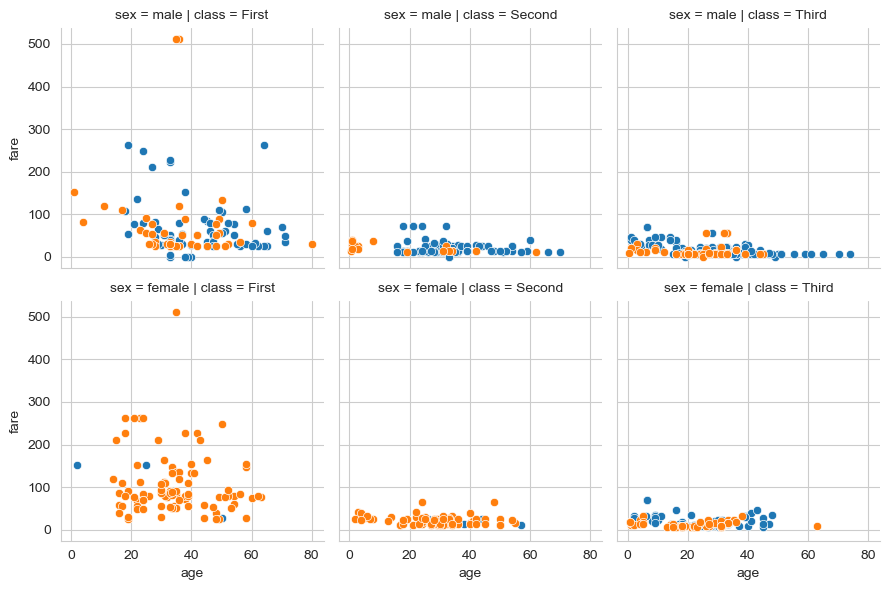

In [30]:
grid = sns.FacetGrid(data = titanic, row ='sex', col = 'class', hue ='survived')
grid.map(sns.scatterplot,'age', 'fare')

In [31]:
filter1 = titanic['gender'] == 1
filter2 = titanic['class'].isin(['First', 'Second'])

In [32]:
titanic['female_class'] = (filter1 & filter2).astype(int)

In [33]:
titanic['female_class']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    0
890    0
Name: female_class, Length: 891, dtype: int32

In [34]:
titanic.to_csv('preprocessed_titanic.csv')

In [35]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,log_fare,gender,female_class
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,1,no_deck,Southampton,no,0,"(15, 25]",2.110213,0,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,"(25, 45]",4.280593,1,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,0,no_deck,Southampton,yes,1,"(25, 45]",2.188856,1,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,"(25, 45]",3.990834,1,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,1,no_deck,Southampton,no,1,"(25, 45]",2.202765,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,1,no_deck,Southampton,no,1,"(25, 45]",2.639057,0,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1,"(15, 25]",3.433987,1,1
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,0,no_deck,Southampton,no,0,"(25, 45]",3.196630,1,0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1,"(25, 45]",3.433987,0,0


In [36]:
#One hot encoding


In [37]:
encoded = pd.get_dummies(titanic[['deck', 'embark_town', 'class', 'age_group', 'who']])

In [38]:
titanic = titanic.join(encoded)

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   survived                 891 non-null    int64   
 1   pclass                   891 non-null    int64   
 2   sex                      891 non-null    object  
 3   age                      891 non-null    float64 
 4   sibsp                    891 non-null    int64   
 5   parch                    891 non-null    int64   
 6   fare                     891 non-null    float64 
 7   embarked                 889 non-null    object  
 8   class                    891 non-null    category
 9   who                      891 non-null    object  
 10  adult_male               891 non-null    int32   
 11  deck                     891 non-null    category
 12  embark_town              891 non-null    object  
 13  alive                    891 non-null    object  
 14  alone     

In [40]:
data = titanic.drop(columns = ['deck', 'embarked', 'who', 'class', 'age_group', 'embark_town', 'sex' ])

In [41]:
data = data.drop(columns = ['fare', 'alive'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   adult_male               891 non-null    int32  
 6   alone                    891 non-null    int32  
 7   log_fare                 891 non-null    float64
 8   gender                   891 non-null    int64  
 9   female_class             891 non-null    int32  
 10  deck_A                   891 non-null    uint8  
 11  deck_B                   891 non-null    uint8  
 12  deck_C                   891 non-null    uint8  
 13  deck_D                   891 non-null    uint8  
 14  deck_E                   8

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [45]:
X, y = data.drop(columns = ['survived']), data['survived']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =90)

In [47]:
n_features = len(x_train.columns)
tree = DecisionTreeClassifier(max_depth =round(np.log2(n_features)), max_features = round(n_features/2))

In [ ]:
data

In [48]:

tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=16)

In [49]:
y_pred = tree.predict(x_test)

In [50]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [51]:
metrics.accuracy_score(y_test, y_pred)*100

80.71748878923766

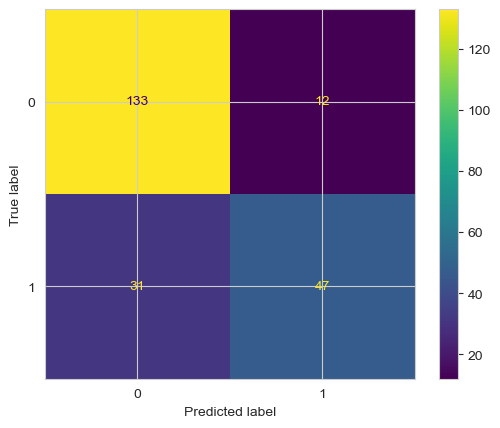

In [52]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
forest = RandomForestClassifier(max_depth =round(np.log2(n_features)), max_features = round(n_features/2))

In [55]:
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=16)

In [56]:
y_pred = forest.predict(x_test)

In [57]:
metrics.accuracy_score(y_test, y_pred)*100

80.26905829596413

In [58]:
pd.Series(forest.feature_importances_, index = x_train.columns).sort_values(ascending = False)

who_man                    0.226404
female_class               0.161216
adult_male                 0.125071
log_fare                   0.105190
age                        0.063313
class_Third                0.049294
sibsp                      0.046140
pclass                     0.041137
gender                     0.035929
who_woman                  0.030485
deck_no_deck               0.024344
deck_E                     0.013162
parch                      0.008295
who_child                  0.007908
deck_D                     0.007060
age_group_(25, 45]         0.006706
class_First                0.006320
embark_town_Cherbourg      0.006079
alone                      0.005147
embark_town_Southampton    0.004875
class_Second               0.004317
age_group_(15, 25]         0.003955
embark_town_Queenstown     0.003584
age_group_(0, 15]          0.003517
deck_C                     0.003083
age_group_(45, 60]         0.002147
deck_B                     0.001996
age_group_(60, 70]         0